<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/isolation_forest_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

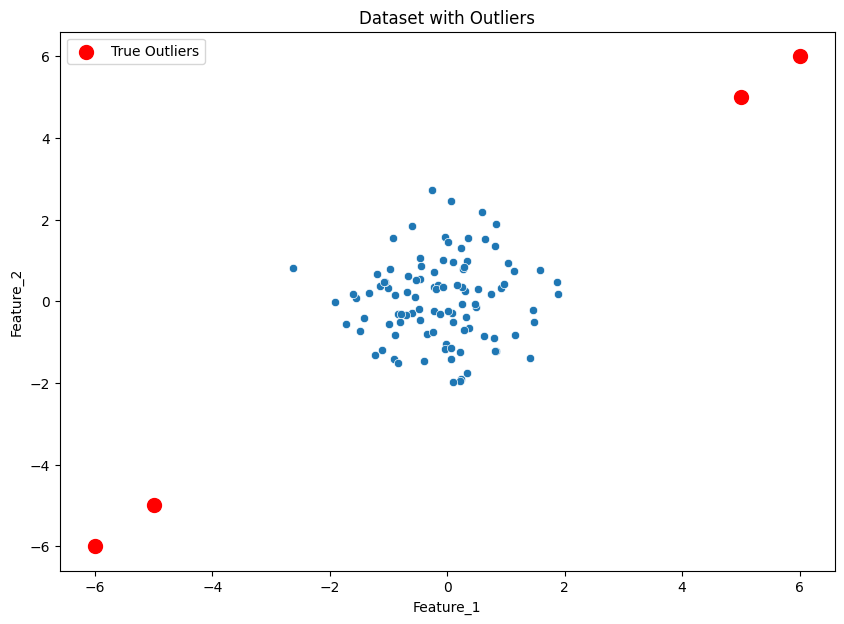

In [2]:
np.random.seed(42)
normal_data = np.random.normal(0, 1, (100, 2))  # 100 normal points

# Generate anomalies (outliers)
anomalies = np.array([[5, 5], [-5, -5], [6, 6], [-6, -6]])  # 4 anomaly points

# Combine normal data with anomalies
X = np.vstack((normal_data, anomalies))
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])

# Visualize Dataset
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Feature_1", y="Feature_2", data=df)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color="red", label="True Outliers", s=100)
plt.legend()
plt.title("Dataset with Outliers")
plt.show()

In [3]:
# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit model to the data
iso_forest.fit(X)

# Predict anomalies (-1 = anomaly, 1 = normal)
predictions = iso_forest.predict(X)

# Add predictions to DataFrame
df["anomaly"] = predictions

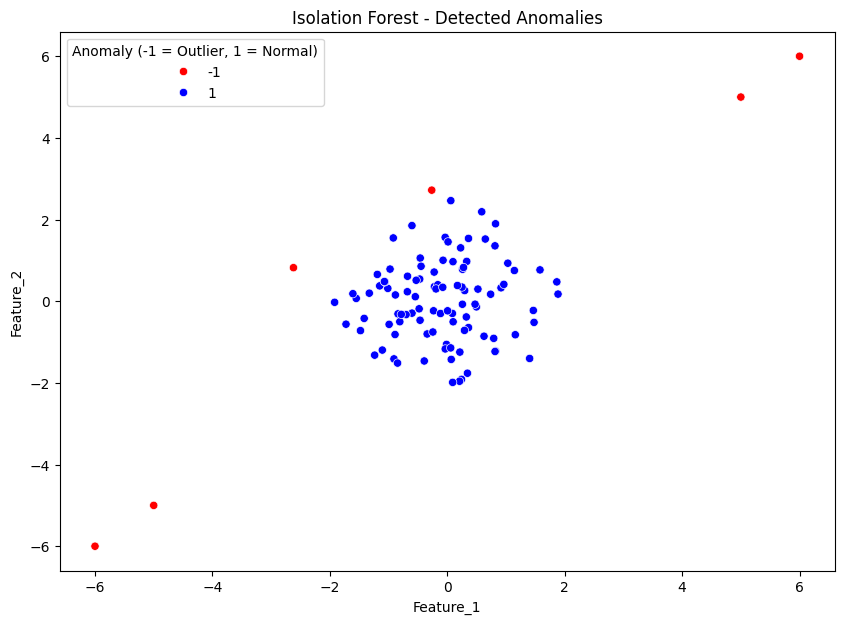

In [4]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Feature_1", y="Feature_2", hue="anomaly", data=df, palette={1: 'blue', -1: 'red'})
plt.title("Isolation Forest - Detected Anomalies")
plt.legend(title="Anomaly (-1 = Outlier, 1 = Normal)")
plt.show()


In [6]:
# Extract detected anomalies
anomalies_detected = df[df["anomaly"] == -1]
print("Detected Anomalies:\n", anomalies_detected)


Detected Anomalies:
      Feature_1  Feature_2  anomaly
37   -2.619745   0.821903       -1
89   -0.264657   2.720169       -1
100   5.000000   5.000000       -1
101  -5.000000  -5.000000       -1
102   6.000000   6.000000       -1
103  -6.000000  -6.000000       -1


In [7]:
anomaly_scores = iso_forest.decision_function(X)

# Add scores to DataFrame
df["anomaly_score"] = anomaly_scores

# Display anomalies with scores
print(df[df["anomaly"] == -1][["Feature_1", "Feature_2", "anomaly_score"]])

     Feature_1  Feature_2  anomaly_score
37   -2.619745   0.821903      -0.028318
89   -0.264657   2.720169      -0.005602
100   5.000000   5.000000      -0.195523
101  -5.000000  -5.000000      -0.206646
102   6.000000   6.000000      -0.230034
103  -6.000000  -6.000000      -0.241020


Lower scores → More likely to be anomalies.
Higher scores → Less likely to be anomalies.

In [8]:
df

,Feature_1,Feature_2,anomaly,anomaly_score
0,0.496714,-0.138264,1,0.167269
1,0.647689,1.523030,1,0.110974
2,-0.234153,-0.234137,1,0.179394
3,1.579213,0.767435,1,0.072312
4,-0.469474,0.542560,1,0.178520
...,...,...,...,...
99,0.058209,-1.142970,1,0.153807
100,5.000000,5.000000,-1,-0.195523
101,-5.000000,-5.000000,-1,-0.206646
102,6.000000,6.000000,-1,-0.230034
